
Problem Description

Apply PCA for this Dataset

Tasks to be performed
1. Data Description? [10 Marks]
2. Read the Data Set and Do some exploratory analysis? – Summary, Structure, Head, Tail etc. [10 Marks]
3. Data Pre-processing?
a. What is the percentage of the NA values? [10 marks]
Hint: If the NA values are low omit them otherwise Impute them.
4. Data Visualizations? – Any kind of Data Visualizations to find out Insights from this Data. [20 marks]
5. Splitting the data into train/test? [20 Marks]
6. Apply PCA and Plot PCA? [30 Marks]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Task 1: Data Description
# Task 2: Read the Data Set and Do some exploratory analysis

In [3]:
#Import data
data = pd.read_csv("data.csv")

#Display the number of columns and rows
data.shape


(77, 14)

In [4]:
#Display data in table format
data

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [5]:
#Describe the data based on the unique values of names
desc = data["name"].describe()
desc

count                                         77
unique                                        77
top       Fruit_&_Fibre_Dates,_Walnuts,_and_Oats
freq                                           1
Name: name, dtype: object

In [6]:
# display the min, max, mean, std, percentile list 
perc =[.20, .40, .60, .80] 
include =['object', 'float', 'int']
desc = data.describe(percentiles = perc, include = None)
desc

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
20%,100.000000,2.000000,0.000000,91.000000,0.000000,12.000000,3.000000,39.000000,25.000000,1.000000,1.000000,0.670000,31.103784
40%,110.000000,2.000000,1.000000,150.000000,1.000000,13.500000,6.000000,63.000000,25.000000,2.000000,1.000000,0.750000,37.418355
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
60%,110.000000,3.000000,1.000000,196.000000,2.000000,15.000000,8.000000,100.000000,25.000000,3.000000,1.000000,1.000000,41.800776
80%,120.000000,3.000000,2.000000,220.000000,3.000000,18.000000,12.000000,136.000000,25.000000,3.000000,1.000000,1.000000,53.277315
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
#Display top 5 rows
data.head(5)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [8]:
#Display last 5 rows
data.tail(5)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193
76,Wheaties_Honey_Gold,110,2,1,200,1.0,16.0,8.0,60.0,25,1,1.0,0.75,36.187559


In [9]:
#Display the data frame information. NUmber of enteries, number of columns, data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
name        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       76 non-null float64
sugars      76 non-null float64
potass      75 non-null float64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(7), int64(6), object(1)
memory usage: 8.5+ KB


In [10]:
# Only list the column names
data.columns

Index(['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [11]:
#List the column names and datatypes associated
data.dtypes

name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [12]:
#List whether any rows are duplicate rows
data.duplicated().sum()

0

In [13]:
#Find Unique values for each of the columns
data.calories.unique()


array([ 70, 120,  50, 110, 130,  90, 100, 140, 150, 160,  80])

In [14]:
#Find Unique values for Protien
data.protein.unique()

array([4, 3, 2, 1, 6, 5])

In [15]:
#Find Unique values for Fat
data.fat.unique()

array([1, 5, 0, 2, 3])

In [16]:
##Find Unique values for Sodium
data.sodium.unique()

array([130,  15, 260, 140, 200, 180, 125, 210, 220, 290, 280,  90,  80,
       190,   0, 160, 240, 135,  45, 170,  75, 250, 150,  95, 320,  70,
       230])

In [17]:
#Find Unique values for Fiber
data.fiber.unique()

array([10. ,  2. ,  9. , 14. ,  1. ,  1.5,  4. ,  5. ,  0. ,  3. ,  6. ,
        2.7,  2.5])

In [18]:
#Find Unique values for Carbo
data.carbo.unique()

array([ 5. ,  8. ,  7. , 14. , 10.5, 11. , 18. , 15. , 13. , 12. , 17. ,
       22. , 21. , 10. , 11.5, 20. , 16. , 13.5,  nan, 23. , 19. ,  9. ])

In [19]:
#Find Unique values for Sugars
data.sugars.unique()

array([ 6.,  8.,  5.,  0., 10., 14., 12.,  1.,  9.,  7., 13.,  3.,  2.,
       11., 15.,  4., nan])

In [20]:
#Find Unique values for Potass
data.potass.unique()

array([280., 135., 320., 330.,  nan,  70.,  30., 100., 125., 190.,  35.,
       105.,  45.,  55.,  25.,  20.,  65., 160., 120.,  80., 200.,  40.,
        85.,  90.,  60.,  95., 170., 130., 260.,  15.,  50., 110., 240.,
       140., 230., 115.])

In [21]:
#Find Unique values for vitamins
data.vitamins.unique()

array([ 25,   0, 100])

In [22]:
#Find Unique values for Shelf
data.shelf.unique() 


array([3, 1, 2])

In [23]:
#Find Unique values for Weight
data.weight.unique()


array([1.  , 1.33, 1.25, 1.3 , 1.5 , 0.5 , 0.83])

In [24]:
#Find Unique values for Cups
data.cups.unique()

array([0.33, 1.  , 0.5 , 0.75, 0.67, 1.25, 0.8 , 0.88, 0.25, 1.33, 1.5 ,
       1.13])

In [25]:
#Find Unique values for Rating
data.rating.unique()

array([68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541,
       33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999,
       19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791,
       22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856,
       32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765,
       35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292,
       31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074,
       26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965,
       29.924285, 40.69232 , 59.642837, 30.450843, 37.840594, 41.50354 ,
       60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034  ,
       55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787,
       31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844,
       39.106174, 27.753301, 49.787445, 51.592193, 36.187559])

In [26]:
#Find if any values are null 
data.isnull().sum()

name        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [27]:
#Find the null fields
print("Total Number of null fields: " , sum(data.isnull().values.ravel()))

Total Number of null fields:  4


In [28]:
#Find the NULL rows
data.isna().sum()
data[data.isna().any(axis=1)]

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


# Task 3: Data Pre-processing 
# a. What is the percentage of the NA values? 
#Hint: If the NA values are low omit them otherwise Impute them.

In [29]:
#Calculate the percentage of Null Columns
per_null = round(data.isnull().sum()/len(data)*100,2)
per_null

name        0.0
calories    0.0
protein     0.0
fat         0.0
sodium      0.0
fiber       0.0
carbo       1.3
sugars      1.3
potass      2.6
vitamins    0.0
shelf       0.0
weight      0.0
cups        0.0
rating      0.0
dtype: float64

In [30]:
# Calculating the percentage of NULL values and dropping those rows if less than 5% of total rows
for i in (data.columns):
    if  ((data.isnull().sum()[i]/len(data)*100) < 5.0)&(per_null[i]!= 0.0):
        i
        print("Percentage of  NULL values in ",per_null[i], "%. The attribute is < 5% hence not imputing but dropping rows")
    elif ((data.isnull().sum()[i]/len(data)*100) >= 5.0)&(per_null[i]!= 0.0):
        print("Percentage of NULL values in ",i, " attribute is > 5% so will need to impute")
    else:
        print("No NULL values in ",i, " attribute, hence ignoring" )
        


No NULL values in  name  attribute, hence ignoring
No NULL values in  calories  attribute, hence ignoring
No NULL values in  protein  attribute, hence ignoring
No NULL values in  fat  attribute, hence ignoring
No NULL values in  sodium  attribute, hence ignoring
No NULL values in  fiber  attribute, hence ignoring
Percentage of  NULL values in  1.3 %. The attribute is < 5% hence not imputing but dropping rows
Percentage of  NULL values in  1.3 %. The attribute is < 5% hence not imputing but dropping rows
Percentage of  NULL values in  2.6 %. The attribute is < 5% hence not imputing but dropping rows
No NULL values in  vitamins  attribute, hence ignoring
No NULL values in  shelf  attribute, hence ignoring
No NULL values in  weight  attribute, hence ignoring
No NULL values in  cups  attribute, hence ignoring
No NULL values in  rating  attribute, hence ignoring


In [31]:
#Cleaning the data by dropping NULL Value rows inplace

data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [32]:
# Dropped data.shape
data= data.set_index('name')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 13 columns):
calories    74 non-null int64
protein     74 non-null int64
fat         74 non-null int64
sodium      74 non-null int64
fiber       74 non-null float64
carbo       74 non-null float64
sugars      74 non-null float64
potass      74 non-null float64
vitamins    74 non-null int64
shelf       74 non-null int64
weight      74 non-null float64
cups        74 non-null float64
rating      74 non-null float64
dtypes: float64(7), int64(6)
memory usage: 8.1+ KB


In [33]:
#Checking whether there are any more null value rows
per_null = round(data.isnull().sum()/len(data)*100,2)
per_null

calories    0.0
protein     0.0
fat         0.0
sodium      0.0
fiber       0.0
carbo       0.0
sugars      0.0
potass      0.0
vitamins    0.0
shelf       0.0
weight      0.0
cups        0.0
rating      0.0
dtype: float64

# Task 4: Data Visualizations? – Any kind of Data Visualizations to find out Insights from this Data.

In [34]:
# Top three item (Breakfast Cereals) based on rating 
data.sort_values(by=['rating'], ascending=False)['rating'].head(3)

name
All-Bran_with_Extra_Fiber    93.704912
Shredded_Wheat_'n'Bran       74.472949
Shredded_Wheat_spoon_size    72.801787
Name: rating, dtype: float64

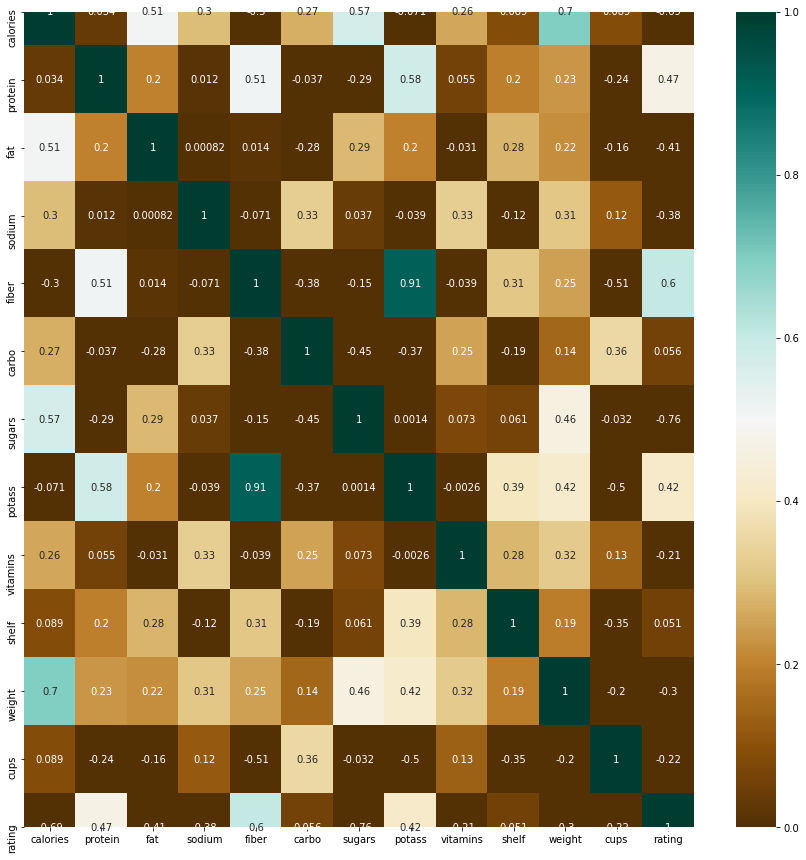

In [35]:
plt.figure(figsize=(15,15))
sea.heatmap(data.corr(), annot=True, vmin=0, cmap='BrBG', linecolor='white', robust=True );




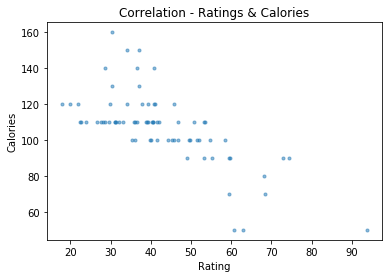

In [36]:
# Correlation between the customer ratings and various other attributes like calories, fibre, protein etc

# Correlation between the customer ratings and calories
area = np.pi*3
plt.scatter(data.rating, data.calories, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Calories')
plt.xlabel('Rating')
plt.ylabel('Calories')
plt.show()
# Indicates Customer Rating and Calories are strong negatively correlated

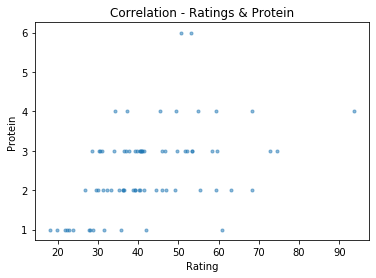

In [37]:

# Correlation between the customer ratings and protein content
area = np.pi*3
plt.scatter(data.rating, data.protein, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Protein')
plt.xlabel('Rating')
plt.ylabel('Protein')
plt.show()
# Indicates Customer Rating and Protein content are positively correlated


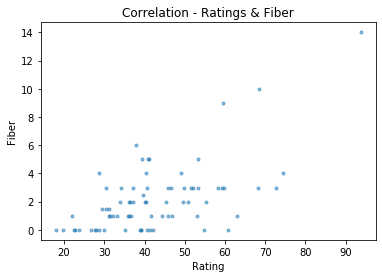

In [38]:

# Correlation between the customer ratings and fiber content
area = np.pi*3
plt.scatter(data.rating, data.fiber, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Fiber')
plt.xlabel('Rating')
plt.ylabel('Fiber')
plt.show()
# Indicates Customer Rating and Fiber content are weak positively correlated

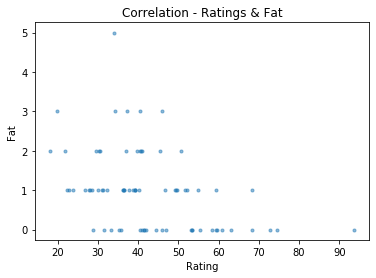

In [39]:
# Correlation between the customer ratings and fat content
area = np.pi*3
plt.scatter(data.rating, data.fat, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Fat')
plt.xlabel('Rating')
plt.ylabel('Fat')
plt.show()
# Indicates Customer Rating and Fat content is negatively correlated

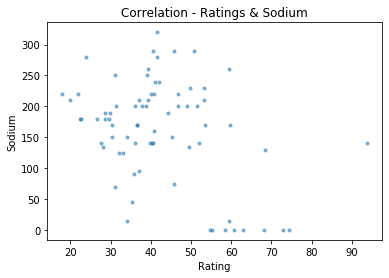

In [40]:
# Correlation between the customer ratings and sodium content
area = np.pi*3
plt.scatter(data.rating, data.sodium, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Sodium')
plt.xlabel('Rating')
plt.ylabel('Sodium')
plt.show()
# Customer Rating and Sodium content doesn't indicate any particular relation 
# but 0 sodium content has high ratings for few instances

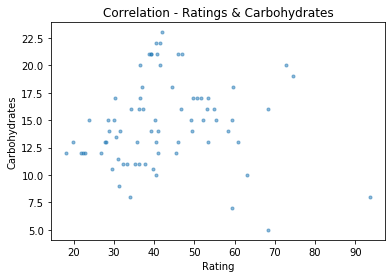

In [41]:
# Correlation between the customer ratings and carbo content
area = np.pi*3
plt.scatter(data.rating, data.carbo, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Carbohydrates')
plt.xlabel('Rating')
plt.ylabel('Carbohydrates')
plt.show()
# Indicates Customer Rating and Carbohydrates content are positively correlated

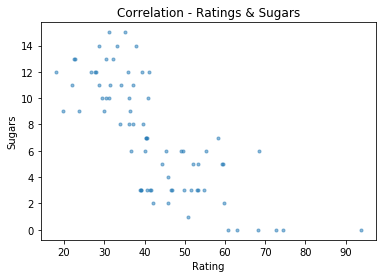

In [42]:
# Correlation between the customer ratings and sugar content
area = np.pi*3
plt.scatter(data.rating, data.sugars, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Sugars')
plt.xlabel('Rating')
plt.ylabel('Sugars')
plt.show()
# Indicates Customer Rating and Sugars content are strong positively correlated

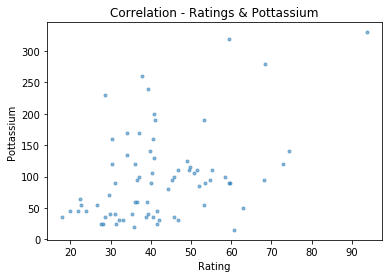

In [43]:
# Correlation between the customer ratings and pottassium content
area = np.pi*3
plt.scatter(data.rating, data.potass, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Pottassium')
plt.xlabel('Rating')
plt.ylabel('Pottassium')
plt.show()
# Indicates Customer Rating and Pottassium content are weak positively correlated

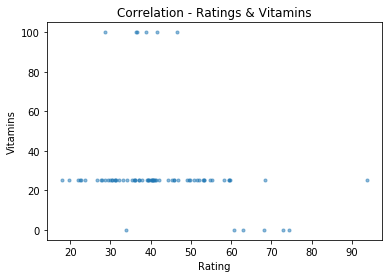

In [44]:
# Correlation between the customer ratings and vitamins content
area = np.pi*3
plt.scatter(data.rating, data.vitamins, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Vitamins')
plt.xlabel('Rating')
plt.ylabel('Vitamins')
plt.show()
# Indicates Higher Customer Rating is related to lower vitamin content and vice-versa. 

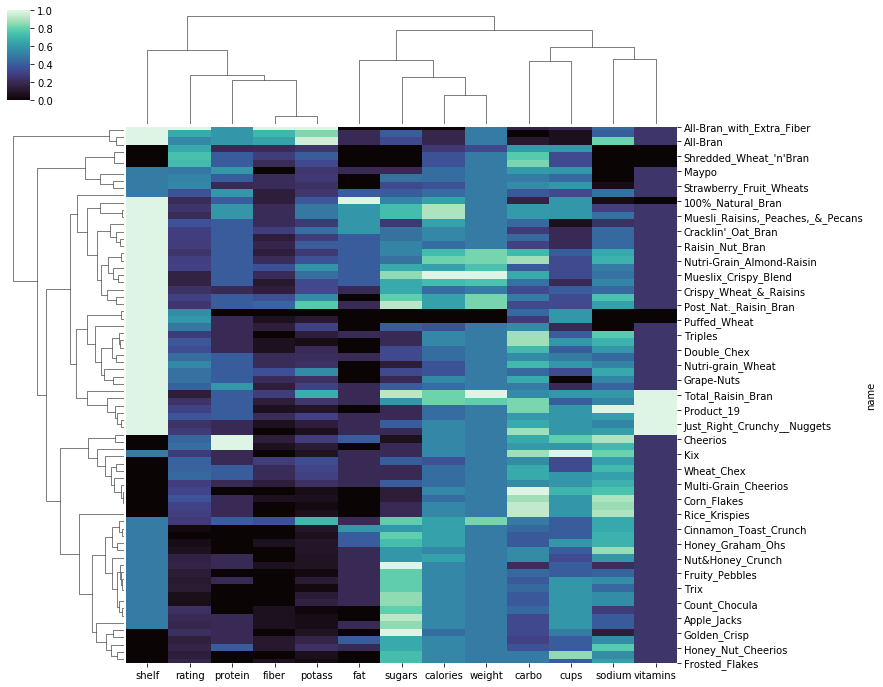

In [45]:
# Plot a matrix dataset as a hierarchically-clustered heatmap with correlation
g = sea.clustermap(data, metric="correlation", cmap="mako", figsize=(12, 12), standard_scale=1)

In [46]:

# Cereals that are displayed on higher shelves
data.index[data['shelf'] == 3]

Index(['100%_Bran', '100%_Natural_Bran', 'All-Bran',
       'All-Bran_with_Extra_Fiber', 'Basic_4', 'Bran_Flakes', 'Clusters',
       'Cracklin'_Oat_Bran', 'Crispix', 'Crispy_Wheat_&_Raisins',
       'Double_Chex', 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
       'Fruitful_Bran', 'Grape_Nuts_Flakes', 'Grape-Nuts',
       'Great_Grains_Pecan', 'Just_Right_Crunchy__Nuggets',
       'Just_Right_Fruit_&_Nut', 'Muesli_Raisins,_Dates,_&_Almonds',
       'Muesli_Raisins,_Peaches,_&_Pecans', 'Mueslix_Crispy_Blend',
       'Nutri-Grain_Almond-Raisin', 'Nutri-grain_Wheat',
       'Oatmeal_Raisin_Crisp', 'Post_Nat._Raisin_Bran', 'Product_19',
       'Puffed_Rice', 'Puffed_Wheat', 'Quaker_Oat_Squares', 'Raisin_Nut_Bran',
       'Raisin_Squares', 'Total_Corn_Flakes', 'Total_Raisin_Bran',
       'Total_Whole_Grain', 'Triples'],
      dtype='object', name='name')

In [47]:
# Cereals that are displayed on middle shelves
data.index[data['shelf'] == 2]

Index(['Apple_Jacks', 'Cap'n'Crunch', 'Cinnamon_Toast_Crunch', 'Cocoa_Puffs',
       'Corn_Pops', 'Count_Chocula', 'Froot_Loops', 'Frosted_Mini-Wheats',
       'Fruity_Pebbles', 'Golden_Grahams', 'Honey_Graham_Ohs', 'Kix', 'Life',
       'Lucky_Charms', 'Maypo', 'Nut&Honey_Crunch', 'Raisin_Bran', 'Smacks',
       'Strawberry_Fruit_Wheats', 'Trix'],
      dtype='object', name='name')

In [48]:
# Cereals that are displayed on Lower shelves
data.index[data['shelf'] == 1]

Index(['Apple_Cinnamon_Cheerios', 'Bran_Chex', 'Cheerios', 'Corn_Chex',
       'Corn_Flakes', 'Frosted_Flakes', 'Golden_Crisp', 'Honey_Nut_Cheerios',
       'Honey-comb', 'Multi-Grain_Cheerios', 'Rice_Chex', 'Rice_Krispies',
       'Shredded_Wheat', 'Shredded_Wheat_'n'Bran', 'Shredded_Wheat_spoon_size',
       'Special_K', 'Wheat_Chex', 'Wheaties', 'Wheaties_Honey_Gold'],
      dtype='object', name='name')

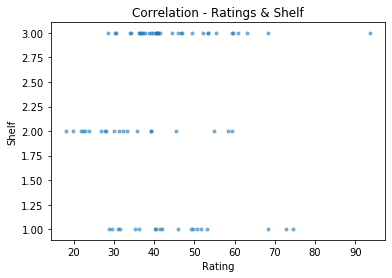

In [49]:
# Correlation between the customer ratings and shelf the product is placed
area = np.pi*3
plt.scatter(data.rating, data.shelf, s=area, alpha=0.5)
plt.title('Correlation - Ratings & Shelf')
plt.xlabel('Rating')
plt.ylabel('Shelf')
plt.show()
# Indicates that lower and moderate customer rated products were placed in the middle shelf and 
# moderate to higher rated products were placed in the top shelf 
# moderately rated products were placed in the bottom shelf

# Task 5: Splitting the data into train/test


In [50]:
# Split the dataset into Training and Test datasets so that PCA is applied first only on the Training dataset
data_target = pd.DataFrame(data = data.rating, columns = ['rating'])
data_predictors = data.drop('rating', axis=1)
datap_train,datap_test,datat_train,datat_test=train_test_split(data_predictors,data_target,test_size=0.2)
datap_train.head()




,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,
Grape-Nuts,110,3,0,170,3.0,17.0,3.0,90.0,25,3,1.00,0.25
Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75
Cheerios,110,6,2,290,2.0,17.0,1.0,105.0,25,1,1.00,1.25
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50
Corn_Chex,110,2,0,280,0.0,22.0,3.0,25.0,25,1,1.00,1.00


In [51]:
# Performing PCA on un-normalized variables will lead to insanely large loadings for 
# variables with high variance. In turn, this will lead to dependence of a principal 
# component on the variable with high variance. This is undesirable.
# Hence Normalization of Predictors for Priciple Component Analysis.
# Normalized predictors have mean equals to zero and standard deviation equals to one.
Predictors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
'potass', 'vitamins', 'shelf', 'weight', 'cups']
Norm_data = datap_train.loc[:, Predictors].values
Norm_data = StandardScaler().fit_transform(Norm_data)
Norm_data


array([[ 0.13417058,  0.41241807, -0.93147574,  0.09757204,  0.27234348,
         0.59277952, -0.94862547, -0.14561186, -0.18731716,  0.97654615,
        -0.18265087, -2.40677143],
       [ 1.06547224,  0.41241807,  0.93147574,  0.562764  , -0.11484364,
         0.84170472,  0.20299804, -0.01344109, -0.18731716,  0.97654615,
         1.81522132, -0.3612584 ],
       [ 0.13417058,  3.11604761,  0.93147574,  1.49314792, -0.11484364,
         0.59277952, -1.40927487,  0.05264429, -0.18731716, -1.4241298 ,
        -0.18265087,  1.68425463],
       [-2.65973441,  1.31362791, -0.93147574, -0.25132193,  4.53140182,
        -1.64754734, -1.63959957,  3.02648655, -0.18731716,  0.97654615,
        -0.18265087, -1.38401492],
       [ 0.13417058, -0.48879178, -0.93147574,  1.37684993, -0.88921788,
         1.83740554, -0.94862547, -1.00472185, -0.18731716, -1.4241298 ,
        -0.18265087,  0.66149811],
       [ 0.13417058, -1.39000163, -0.93147574,  0.91165797, -0.88921788,
         2.08633075, -

# Task 6: Apply PCA and Plot PCA

Text(0, 0.5, 'Proportion of variance explained')

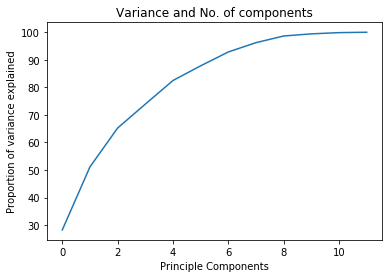

In [52]:
# (PCA)Principal component analysis is a method of extracting important variables 
# (in form of components) from a large set of variables available in a data set. 
# It extracts low dimensional set of features from a high dimensional data set 
# with a motive to capture as much information as possible. With fewer variables, 
# visualization also becomes much more meaningful. PCA is more useful when dealing 
# with 3 or higher dimensional data.
pca = PCA(n_components=12)
pca.fit(Norm_data)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.title('Variance and No. of components')
plt.xlabel('Principle Components')
plt.ylabel('Proportion of variance explained')

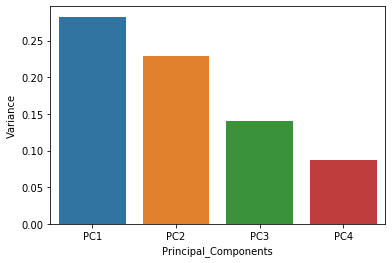

In [53]:
# This plot shows that 4 components results in variance close to ~ 80% and 2 components results in ~60% 
# For simplicity of display in 2Dimension, we’ll select number of components as 2 [PC1 to PC2] and proceed to the modeling stage. 
# This completes the steps to implement PCA on train data.
pca = PCA(n_components=4)
pca.fit(Norm_data)
Norm_data1=pca.fit_transform(Norm_data)

var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

df_pca_varience = pd.DataFrame({'Variance':pca.explained_variance_ratio_, 'Principal_Components':['PC1', 'PC2', 'PC3', 'PC4']})
sea.barplot(x='Principal_Components', y='Variance', data=df_pca_varience)

#Based on the result PC1 and PC2 have higher variance and we need to plot PCA with PC1 & PC2



In [54]:
pca.explained_variance_ratio_

array([0.28247203, 0.22884269, 0.14101235, 0.08671449])

In [55]:
PCA_data = pd.DataFrame(data = Norm_data1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
datat_train1 = datat_train['rating']
datat_train1 = datat_train1.reset_index(drop=True)
PCA_data['rating'] = datat_train1
PCA_data.head()


,PC1,PC2,PC3,PC4,rating
0,0.984570,0.591092,-1.104585,-0.524677,53.371007
1,0.746829,-2.128493,-0.160523,0.569888,37.038562
2,-0.397216,-0.380992,-2.197700,3.355331,50.764999
3,5.203026,3.424485,-2.273365,-0.834113,93.704912
4,-2.692274,-0.252547,-1.687107,0.501987,41.445019


In [56]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCA_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


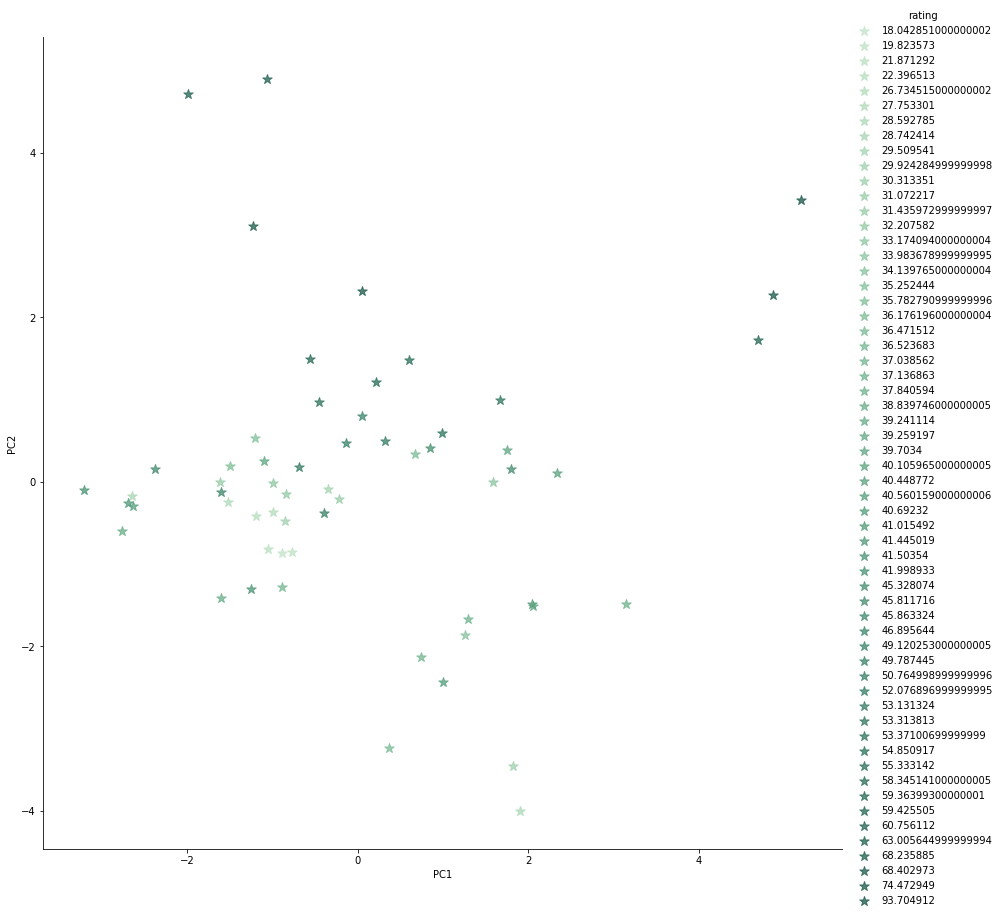

In [57]:
sea.lmplot(x='PC1', y='PC2', data=PCA_data, height=12, aspect=1, markers='*', fit_reg=False, hue='rating', legend=True, scatter_kws={"s":100}, palette="ch:2.5,-.2,dark=.3")
plt.savefig("Result1.pdf")

#Higher rating values are darker and lower rating ones are lighter


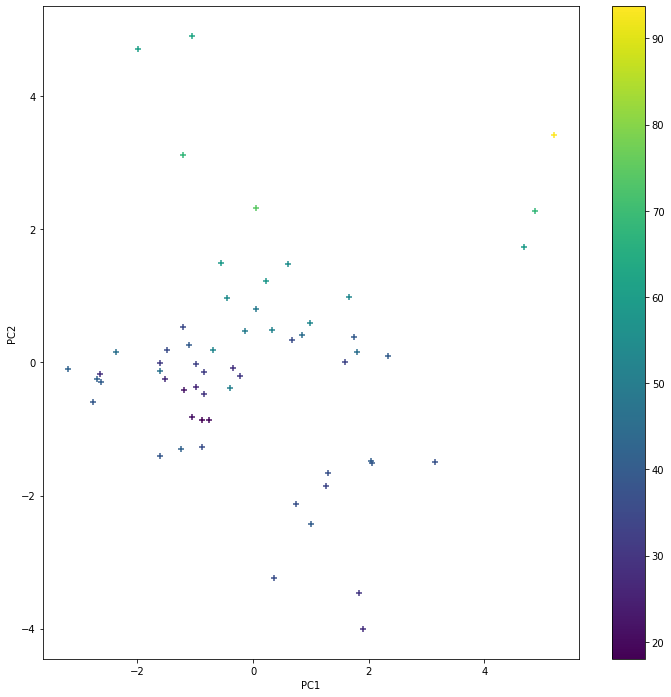

In [58]:
plt.figure(figsize=(12,12))     
plt.scatter(PCA_data['PC1'], PCA_data['PC2'], c=PCA_data['rating'], marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(orientation="vertical")
plt.savefig("Result2.pdf")

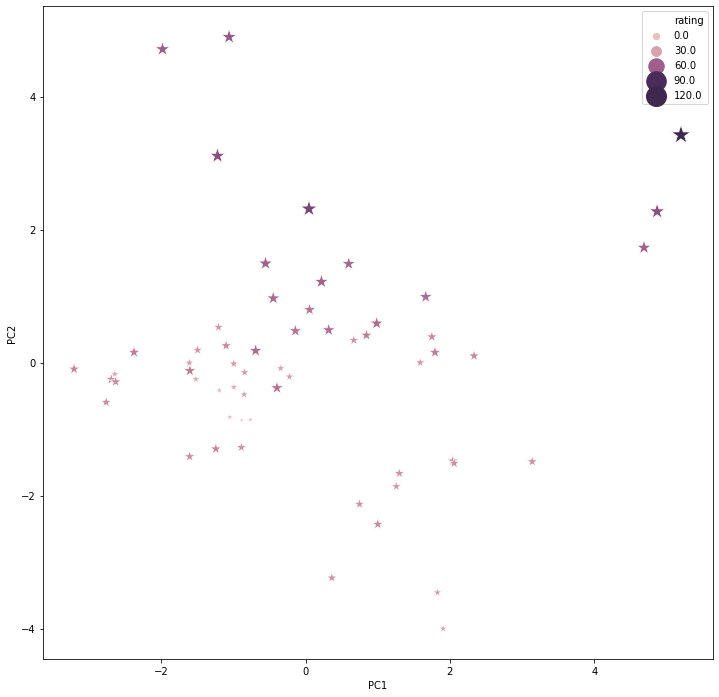

In [59]:
plt.figure(figsize=(12,12))    
cmap = sea.cubehelix_palette(dark=.2, light=.8, as_cmap=True)
sea.scatterplot(x='PC1', y='PC2', data=PCA_data, marker='*', hue="rating", sizes =(40,400), palette=cmap, size="rating")
plt.savefig("Result3.pdf")